In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importar dataset sobre los detalles de autos
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
#leer los datos
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Resumen de la información del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [5]:
# Estadísticas descriptivas
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


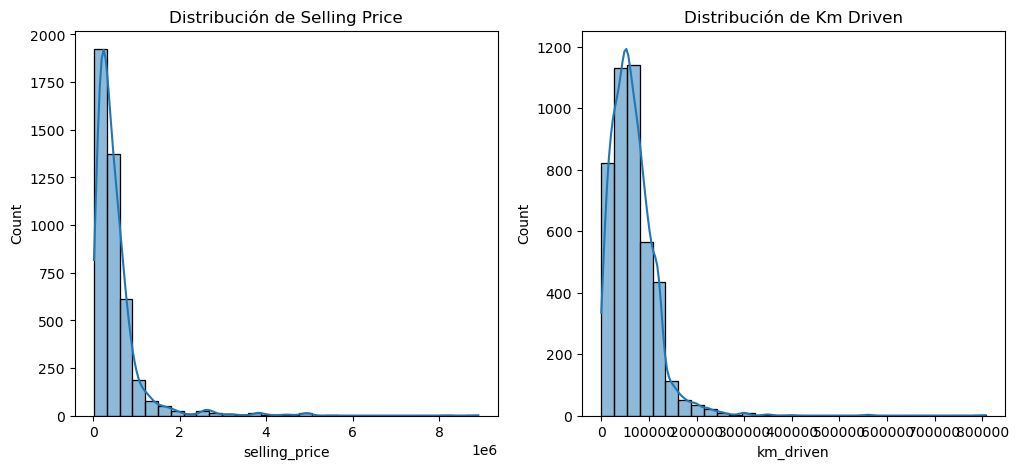

In [12]:
# Distribuciones de variables numéricas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribución de Selling Price')
plt.subplot(1, 2, 2)
sns.histplot(df['km_driven'], kde=True, bins=30)
plt.title('Distribución de Km Driven')
plt.show()

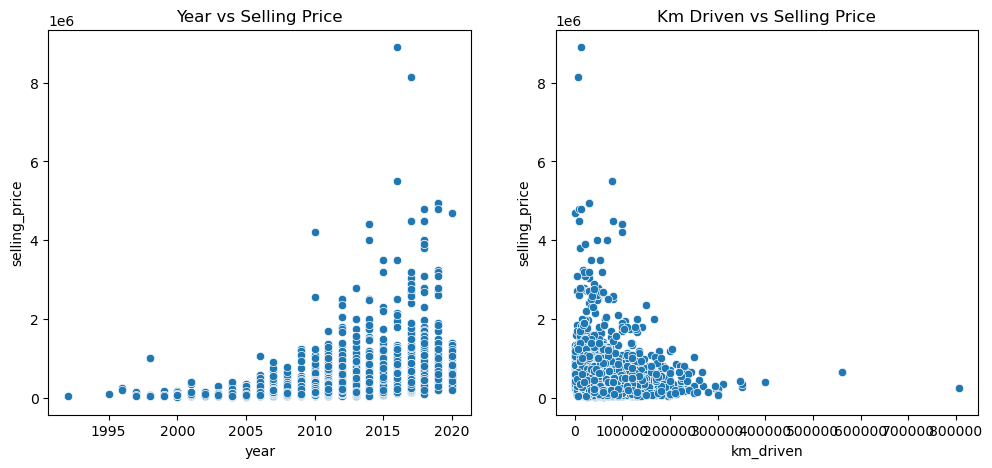

In [13]:
# Relaciones entre variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs Selling Price')
plt.subplot(1, 2, 2)
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Km Driven vs Selling Price')
plt.show()


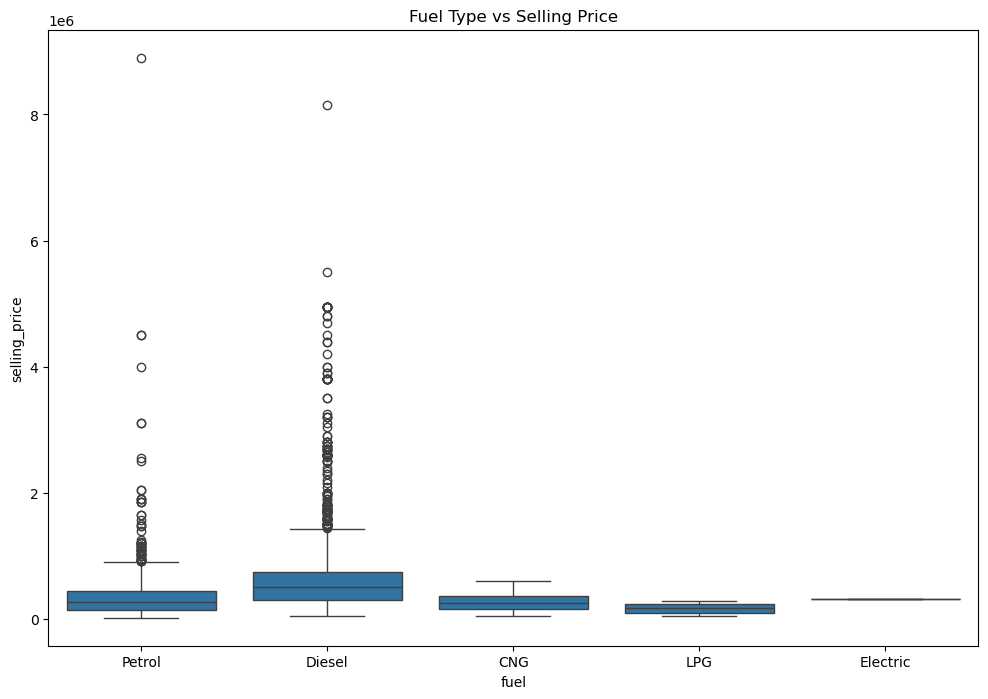

In [14]:
# Boxplots de categorías vs precio
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Fuel Type vs Selling Price')
plt.show()

In [16]:
# Procesamiento de los datos
# Verificar valores faltantes
print("Valores faltantes:\n", df.isnull().sum())

Valores faltantes:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
# Codificar variables categóricas
label_encoder = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = label_encoder.fit_transform(df[col])

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [24]:
# Estandarizar la variable selling_price y km_driven
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])

print(df)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007      -0.767746   0.081139   
1                Maruti Wagon R LXI Minor  2007      -0.638096  -0.347689   
2                    Hyundai Verna 1.6 SX  2012       0.165731   0.724381   
3                  Datsun RediGO T Option  2017      -0.439300  -0.433455   
4                   Honda Amaze VX i-DTEC  2014      -0.093568   1.603479   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014      -0.162716   0.295553   
4336           Hyundai i20 Magna 1.4 CRDi  2014      -0.162716   0.295553   
4337                  Maruti 800 AC BSIII  2009      -0.681313   0.359877   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       0.623827   0.509967   
4339                     Renault KWID RXT  2016      -0.482517  -0.562103   

      fuel  seller_type  transmission  owner  
0        4            1     

In [26]:
from sklearn.preprocessing import MinMaxScaler
#estandarizar la variable year
# Normalizar la columna 'year'
min_max_scaler = MinMaxScaler()
df['year'] = min_max_scaler.fit_transform(df[['year']])

print(df)

                                     name      year  selling_price  km_driven  \
0                           Maruti 800 AC  0.535714      -0.767746   0.081139   
1                Maruti Wagon R LXI Minor  0.535714      -0.638096  -0.347689   
2                    Hyundai Verna 1.6 SX  0.714286       0.165731   0.724381   
3                  Datsun RediGO T Option  0.892857      -0.439300  -0.433455   
4                   Honda Amaze VX i-DTEC  0.785714      -0.093568   1.603479   
...                                   ...       ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  0.785714      -0.162716   0.295553   
4336           Hyundai i20 Magna 1.4 CRDi  0.785714      -0.162716   0.295553   
4337                  Maruti 800 AC BSIII  0.607143      -0.681313   0.359877   
4338     Hyundai Creta 1.6 CRDi SX Option  0.857143       0.623827   0.509967   
4339                     Renault KWID RXT  0.857143      -0.482517  -0.562103   

      fuel  seller_type  tr

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Dividir el dataset en Train y Test (80-20 split)
#X = df.drop('selling_price', axis=1)  
#y = df['selling_price']

# Dividir el dataset en Train y Test (80-20 split)
X = df.drop(['selling_price', 'name'], axis=1)  
y = df['selling_price']  


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Se ha dividido el dataset ")

Se ha dividido el dataset 


In [50]:
# Entrenar el modelo
model = RandomForestRegressor(random_state=42)

# Configurar el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("El modelo ha sido entrenado")

El modelo ha sido entrenado


In [51]:

# Entrenar el modelo con hiperparámetros predeterminados
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)


In [52]:
# Ajustar el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [54]:
# Evaluar el desempeño del modelo en el conjunto de Test
y_pred = model.predict(X_test)
print("Se ha evaluado el desempeño del modelo")

Se ha evaluado el desempeño del modelo


In [58]:
# Calcular métricas de evaluación
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 0.68
MAE: 0.29
R²: 0.50


C:\Users\leidy\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\leidy\AppData\Local\Temp\ipykernel_17736\3857318722.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


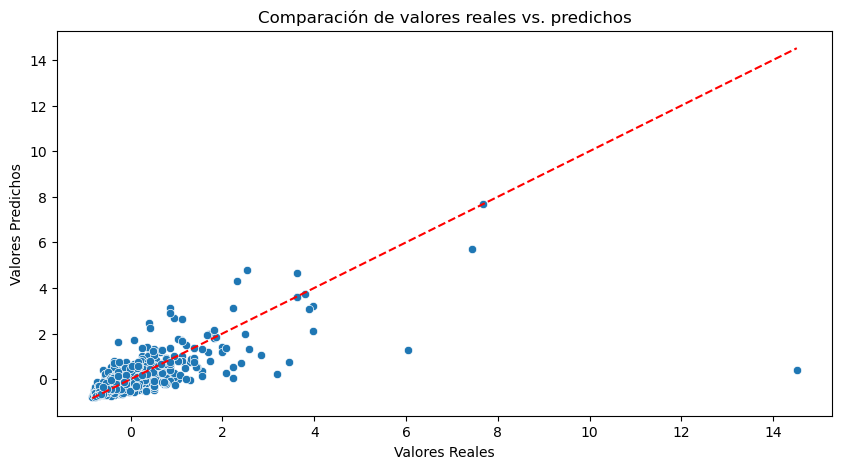

In [59]:
# Comparación de valores reales vs. predichos
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de valores reales vs. predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.show()

In [ ]:
#* Análisis de los resultados* .
# Se puede entender que el modelo está haciendo predicciones ajustadas, 
# el modelo está capturando la relación entre las características del automóvil y su precio de venta y,
# se observa que hay pocos valores alejados indicando que no los puede predecir con precisión.

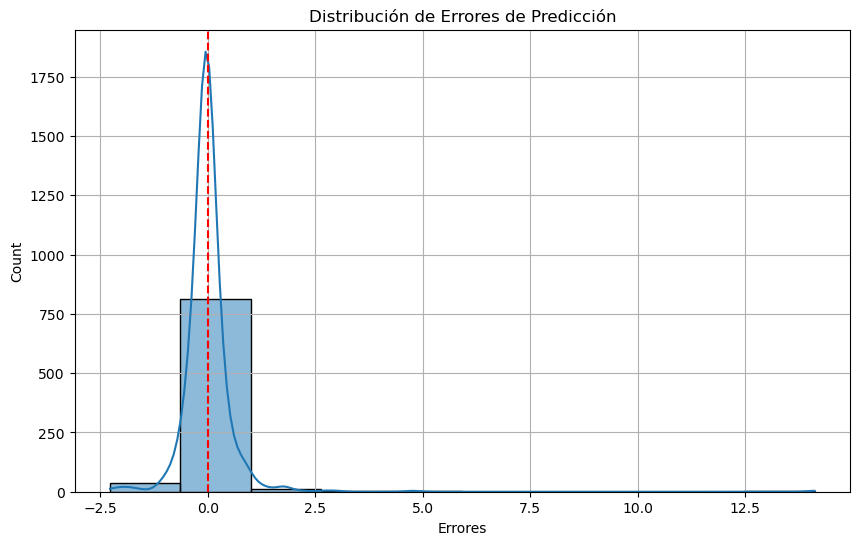

In [61]:
# Calcular errores
errors = y_test - y_pred

# Histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=10, kde=True)
plt.xlabel("Errores")
plt.title("Distribución de Errores de Predicción")
plt.axvline(0, color='red', linestyle='--')  # Línea en 0
plt.grid()
plt.show()

In [ ]:
# Según podemos interpretar de la gráfica que los errores de predicción son pequeños ya que 
# el pico del histograma está cerca a cero, es decir, que los valores a predecir son cercanos a los reales.

# También se observa que la gráfica tiene una cola más larga hacia los valores positivos de los errores, 
# indicando que el modelo puede estar sobreestimando los precios, siendo un posible sesgo.

# La distribución no está muy centrada alrededor de la media, lo que indica una alta variabilidad de los errores,
# es decir, existen casos en los que el modelo está sobreestimando el valor real considerablemente.


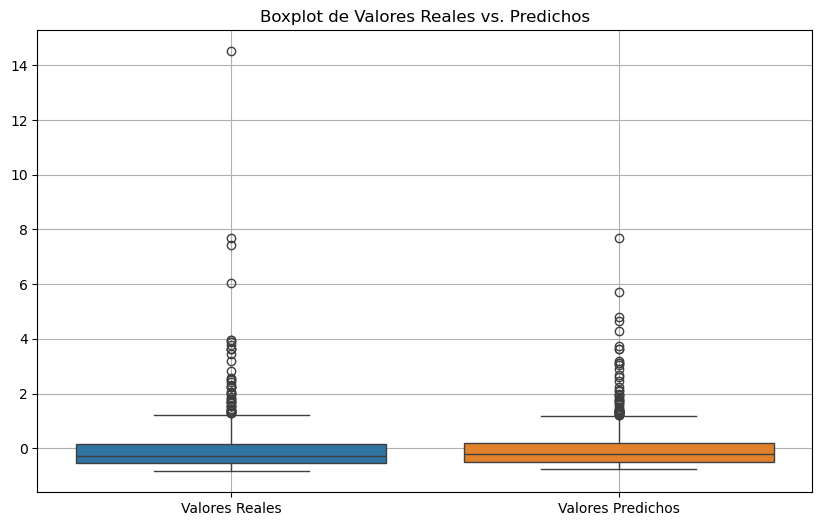

In [62]:
# Crear un DataFrame para el boxplot
results_df = pd.DataFrame({'Valores Reales': y_test, 'Valores Predichos': y_pred})

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title("Boxplot de Valores Reales vs. Predichos")
plt.grid()
plt.show()

In [ ]:
# Este boxplot señala que los valores reales y predichos tienen una mediana cercana a 0, indicando que
# sus predicciones son buenas y los boxplor son similares lo cual indica que estan capturando bien la 
# relacion de las varibles, sin embargo, el modelo el modelos introduce una variabilidad adicional 
# a las predicciones ya que los valores predichos son un poco mayores a los reales.

# Por último, encontramos valores atípicos en los valores reales sobre 14, 8 y 6 y, 
# en los predichos sobre 8 y 6, que pueden influir en los resultados.

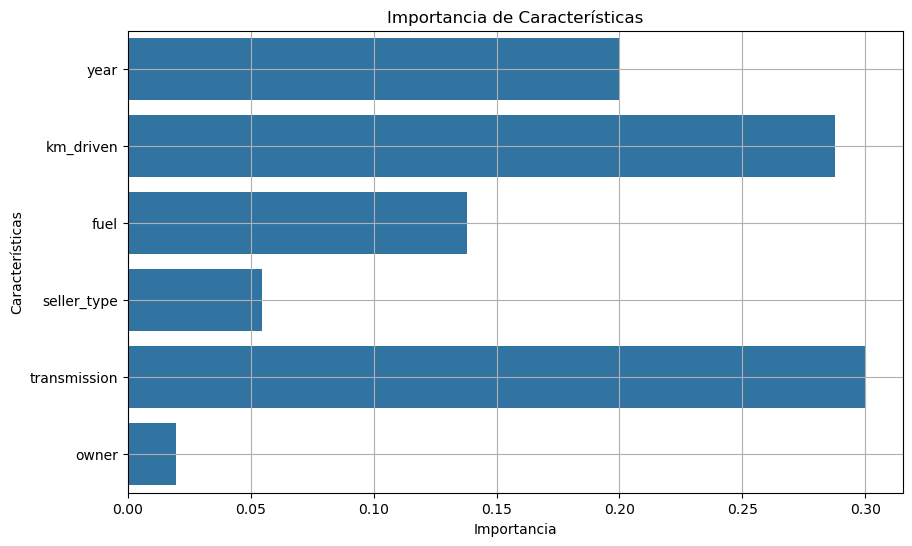

In [63]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X.columns

# Gráfica de Importancia de Características
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.grid()
plt.show()

In [ ]:
# Esta gráfica muestra las variables más importantes en la predicción del modelo,
# en este caso son año de fabricación, kilometros conducidos y trasmisión, se puede
# inferir que los automás mas nuevos tiene un precio más alto, o con menor kilometraje tiene
# un valor más alto en el mercado. Por otra parte, las varibales que menos relevancia tienen 
# determinar el valor del auto son owner y seller_type.

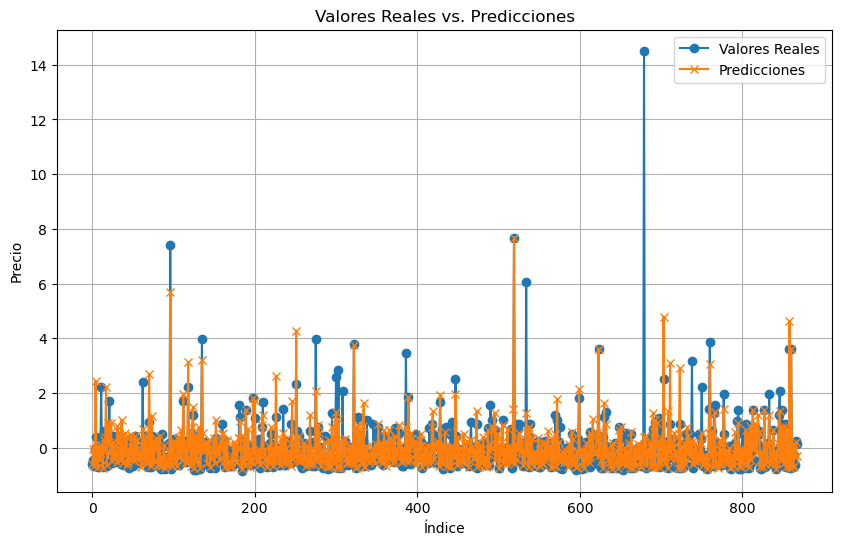

In [64]:
# Gráfica de Predicciones
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', marker='o')
plt.plot(y_pred, label='Predicciones', marker='x')
plt.title("Valores Reales vs. Predicciones")
plt.xlabel("Índice")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# En esta gráfica se compara las predicciones del modelo con los valores reales 
# de la variable precio. Se percibe que los valores reales y predichos estan cerca
# refleja buena relación entre las variables entrantes y precio.

# el modelo es precisio, sin embargo, en puntos como 700 y cerca a 500, existen valores atipicos que el 
# modelo no ha capturado correctamente.

